This file is used for fitting the curve of the avaerage value of bottom 5% of NO2 concentration data for each temperature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get the raw value of so2 so2ncentration and so2rresponding temperature for each node at each timestamp.
so2_temp = pd.read_csv('data/TEMP_so2_raw_hrf.csv',header = 0, index_col=0)

In [3]:
so2_temp = so2_temp.rename({'value_raw_x':'so2_raw', 'value_hrf_x':'so2_hrf','value_raw_y':'temp_raw','value_hrf_y':'temp'}, axis =1) 

In [4]:
so2_temp.head()

timestamp       node_id  so2_raw  so2_hrf  temp_raw   temp
4   2018/10/01 00:00:01  001e06114fd4  -1822.0 -0.44535     786.0  17.20
8   2018/10/01 00:00:02  001e0610ba46   -867.0 -0.33365     806.0  19.70
13  2018/10/01 00:00:02  001e0610f703   -567.0 -0.39218     786.0  17.20
17  2018/10/01 00:00:02  001e061144c0    439.0 -0.24859     802.0  19.20
21  2018/10/01 00:00:04  001e0610ee33    480.0      NaN     787.0  17.35

In [5]:
so2_temp.timestamp = pd.to_datetime(so2_temp.timestamp)

In [6]:
# The time span is from 2018-10-01 to 2019-07-31.
so2_temp.timestamp.describe()

count                28506592
unique               12973606
top       2019-01-11 11:31:22
freq                      634
first     2018-10-01 00:00:01
last      2019-07-31 23:59:58
Name: timestamp, dtype: object

In [7]:
# We have 65 nodes that contain information of NO2 concentration from 2018-10-01 to 2019-07-31.
so2_temp['node_id'].nunique()

65

In [8]:
so2_temp.groupby('node_id').describe()

so2_raw                                                    \
                  count          mean            std        min       25%   
node_id                                                                     
001e06109401    34750.0   1203.564921    6801.810117   -98255.0   -957.00   
001e06109416   192091.0   1250.230620    2754.286062    -3364.0    -80.00   
001e0610b9e9    58966.0   1459.454482    8340.206350   -68060.0   -767.00   
001e0610ba13   975426.0    219.848528    1083.302843  -226100.0   -467.00   
001e0610ba15  1393234.0   6917.041982   32249.914584  -312668.0   -238.00   
001e0610ba16   215713.0   1920.155781    1573.757889    -6943.0    849.00   
001e0610ba46  1229548.0   -113.677033    1729.534126   -86852.0   -769.00   
001e0610bbf9    25651.0  23005.388016   38461.367296    -3757.0    722.50   
001e0610bc10   891446.0 -12632.590072   29233.612735  -367817.0 -24799.00   
001e0610bc12   104408.0 -12984.511311   48569.770181  -314937.0  -5310.00   
001e0610e532    26493.0  16904.334956  217454.187901 -8365870.0  -5638.00   
001e0610e537  1727600.0    559.108991    9128.643609  -246154.0   -977.00   
001e0610e539   166500.0    -43.036721     937.696751    -5774.0   -676.00   
001e0610e835   699311.0   1019.210747    1798.708482  -127067.0    -46.00   
001e0610e8cb    54841.0   8094.594355   29090.686529  -367817.0   -611.00   
001e0610ee33  1564242.0     36.002679    2939.159085   -38413.0   -835.00   
001e0610ee43  1726470.0   -189.702637     918.382616    -4392.0   -806.00   
001e0610ee5d    48543.0   1204.793812    1203.518178    -3549.0    377.50   
001e0610ee82   237573.0     -8.337231     956.795568   -10029.0   -618.00   
001e0610eef2   915543.0     50.094670    8020.018311  -233001.0   -797.00   
001e0610ef27  1005570.0  19889.086005   67838.407836  -367817.0   -618.00   
001e0610f02f    63662.0  -9739.871038   36474.395068  -357247.0 -11541.25   
001e0610f05c  1392880.0  17515.146873   75733.087598  -153943.0  -1028.00   
001e0610f6db  1276460.0   -287.665298     870.231377    -7665.0   -876.00   
001e0610f703   432063.0  55341.046158  102942.863167  -317572.0    -95.00   
001e0610f732    89852.0   5316.276243   25356.649309   -78855.0    773.00   
001e06112e77   295076.0   4880.764915   24656.729111   -15579.0   -581.00   
001e061130f4  1472364.0  18641.163834   54483.564617  -159469.0   -435.00   
001e06113107  1213716.0    288.713523    1081.098143   -12306.0   -377.00   
001e061135cb   201510.0    463.294824   14231.694334  -208161.0   -601.00   
...                 ...           ...            ...        ...       ...   
001e06113d78    30459.0  15485.510490   19284.967119    -3223.0    930.00   
001e06113dbc   526854.0   1736.325354   12203.842179  -367817.0   -320.00   
001e06113f54    28682.0    901.799840     973.706128    -2739.0    238.00   
001e0611441e     1028.0   5489.936770   22009.667308    -3437.0   1703.75   
001e061144be    34842.0    919.820762    1919.324251  -251651.0    139.00   
001e061144c0  1036721.0  10853.711525   44208.741256  -367376.0  -1147.00   
001e061144d6    52017.0   1223.819501   16354.817449   -20866.0   -129.00   
001e06114500  1007047.0   2367.180053   21410.095403  -105073.0   -391.00   
001e06114503   435441.0  33447.115384   75456.779438   -89110.0    -25.00   
001e0611462f   132441.0  18894.969858   48255.357816   -80337.0  -4014.00   
001e061146bc   456128.0  -1801.874961    9086.591458  -312615.0   -991.00   
001e061146cb   232145.0     -2.517689    2173.042229   -35892.0   -926.00   
001e06114fcf   215228.0   3531.217597    8938.070708    -5779.0   -255.00   
001e06114fd4   813099.0    264.372930    4155.364223  -152657.0   -731.00   
001e06115365   164613.0    859.915845    1122.339585    -4241.0     96.00   
001e06115369    31010.0  14649.033118   20868.491413    -4477.0   3583.00   
001e0611537d   124548.0    656.067829    1077.306277   -12552.0    -75.00   
001e06117b41   120853.0   1672.628019    2940.069483    -3941.0    744.00   
001e06117b44

In [9]:
#Get dataframes for each node and save it into a dictionary.
nodes={}
for node_id in so2_temp['node_id'].unique():
    nodes[node_id] = so2_temp[so2_temp['node_id'] == node_id]
    so2_temp[so2_temp['node_id'] == node_id].to_csv('nodedata_SO2/'+str(node_id)+'.csv')

In [11]:
nodes = list(so2_temp['node_id'].unique())

In [12]:
def func(x, a, b, c):
    return a*np.exp(b*x)+c

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


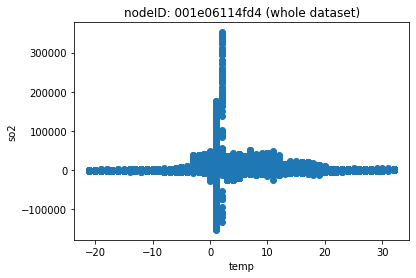

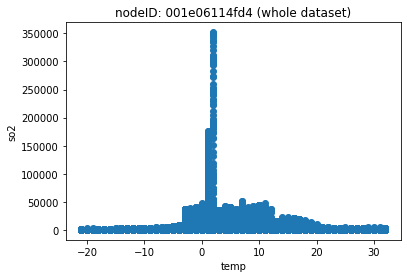

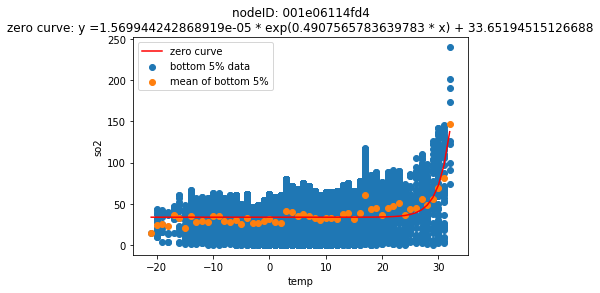

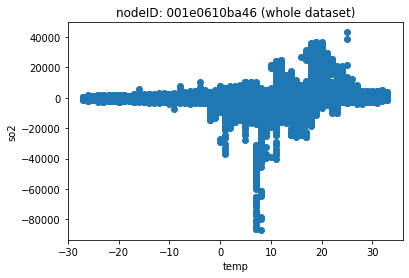

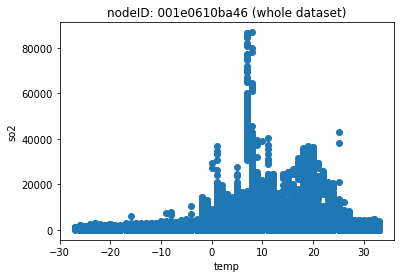

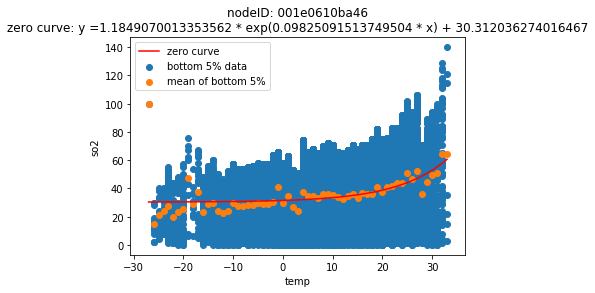

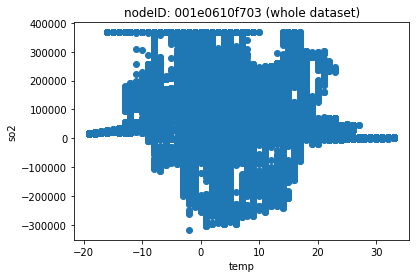

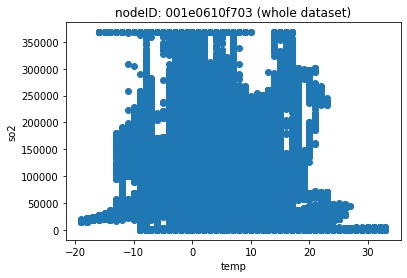

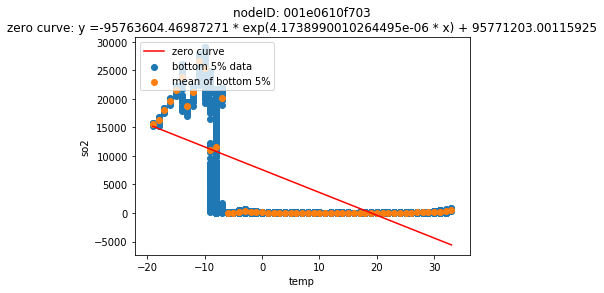

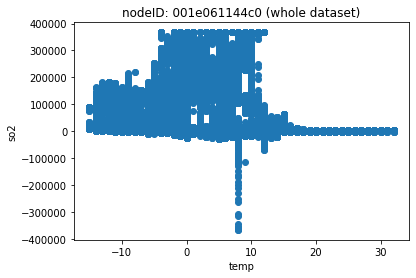

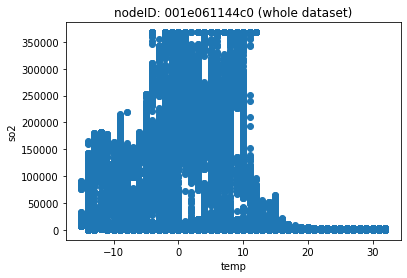

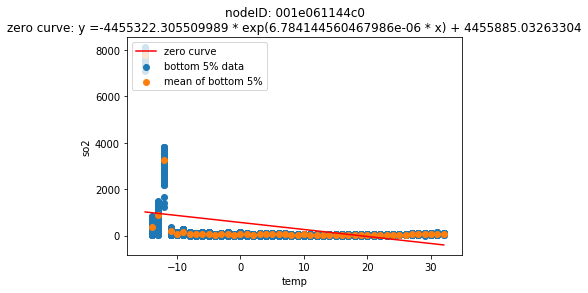

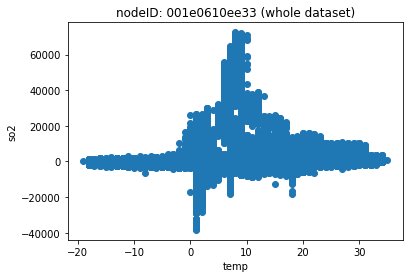

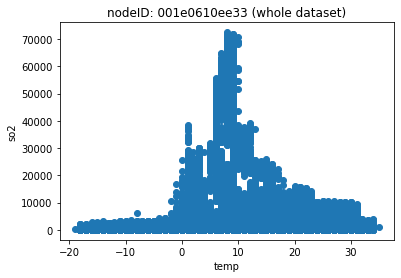

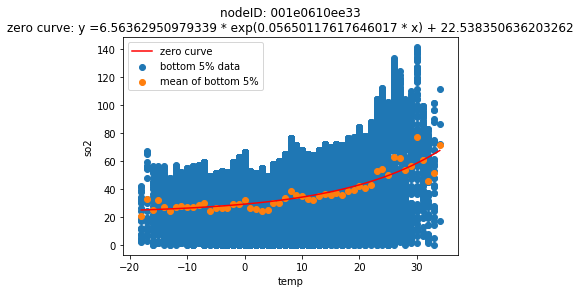

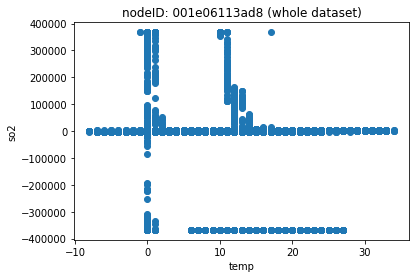

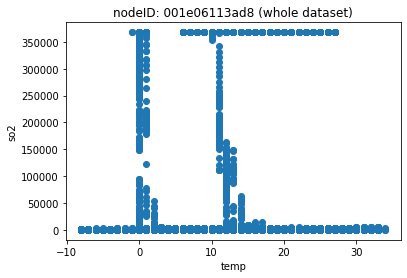

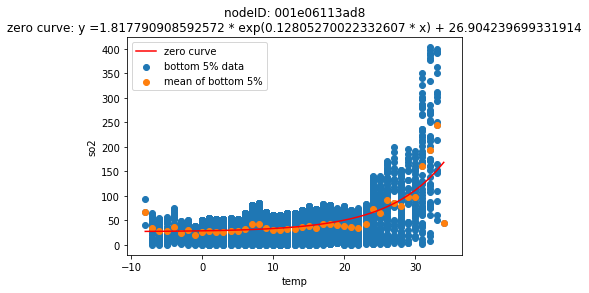

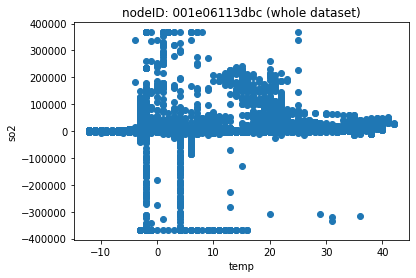

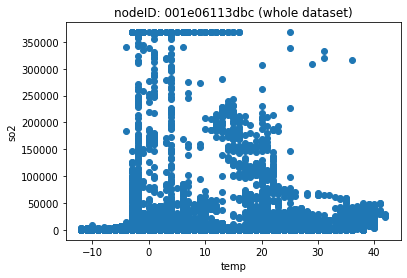

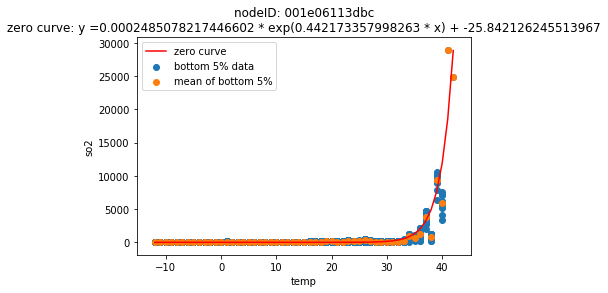

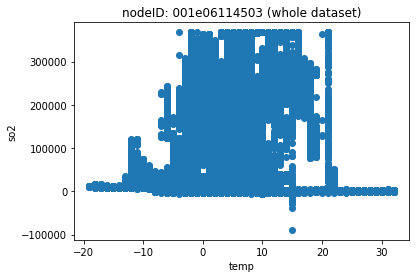

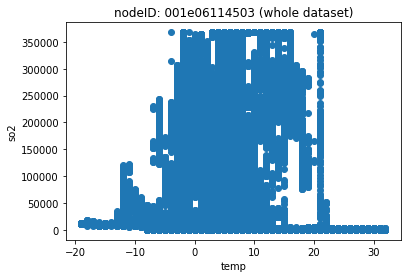

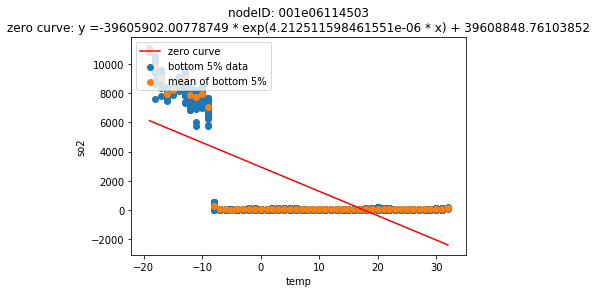

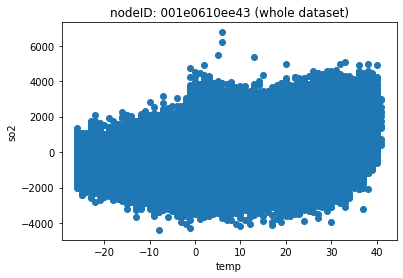

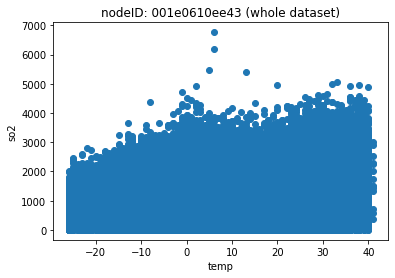

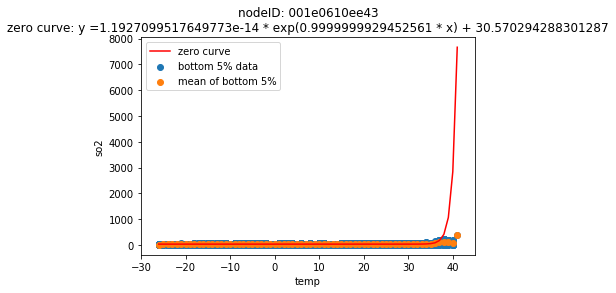

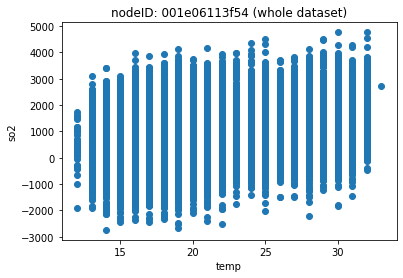

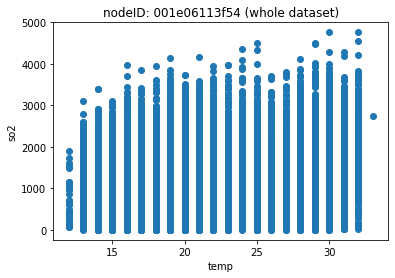

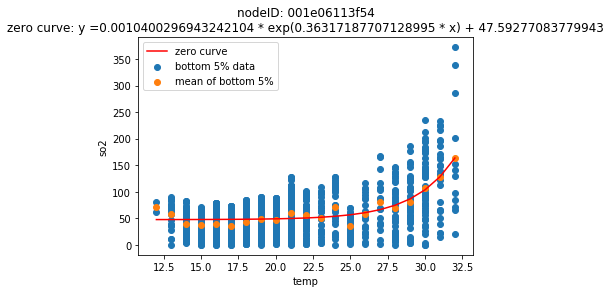

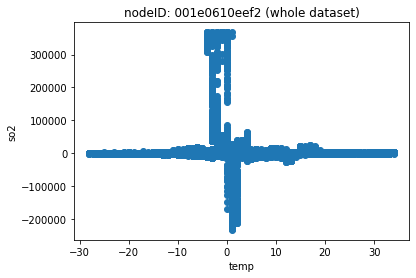

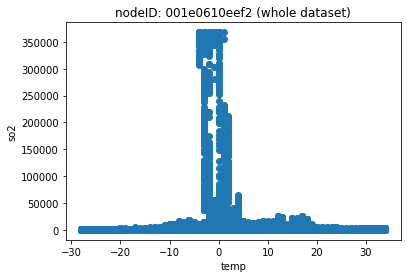

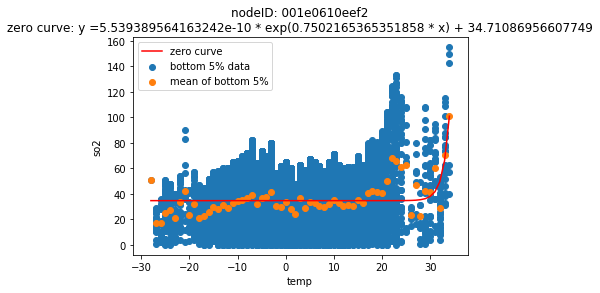

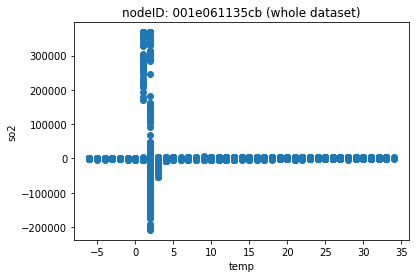

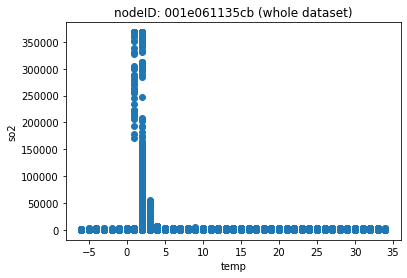

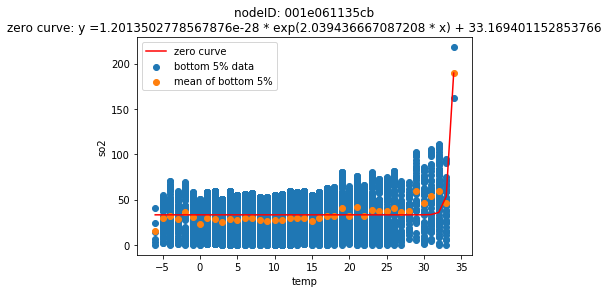

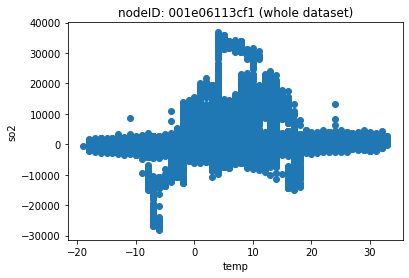

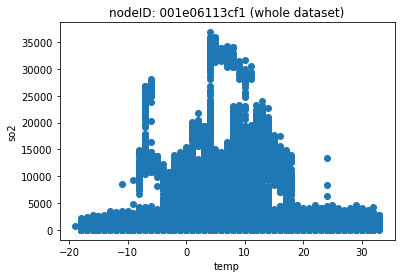

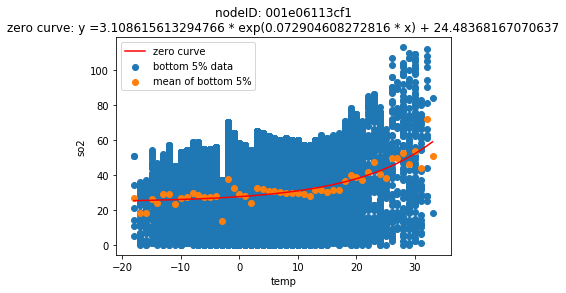

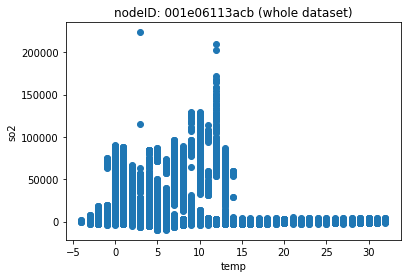

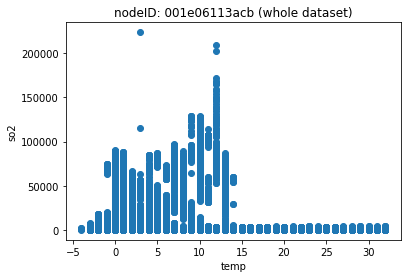

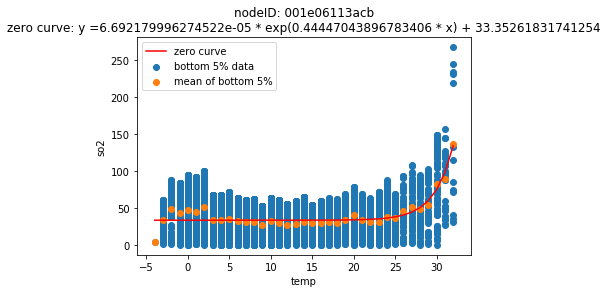

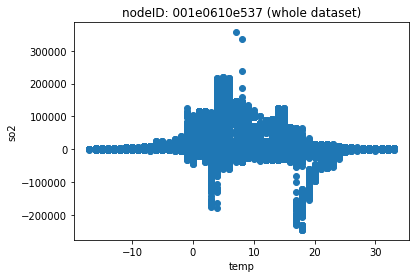

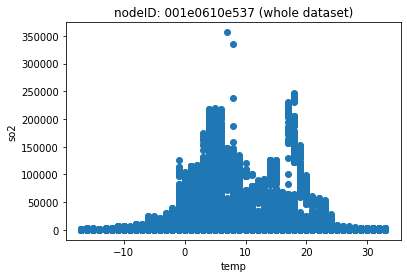

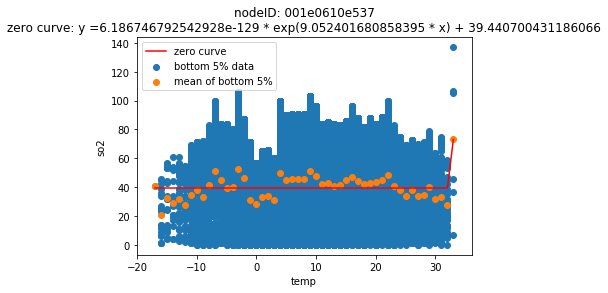

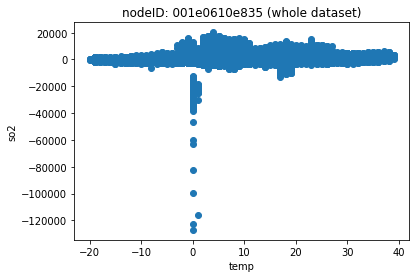

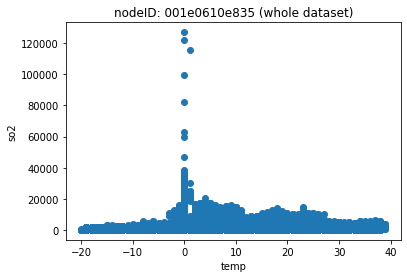

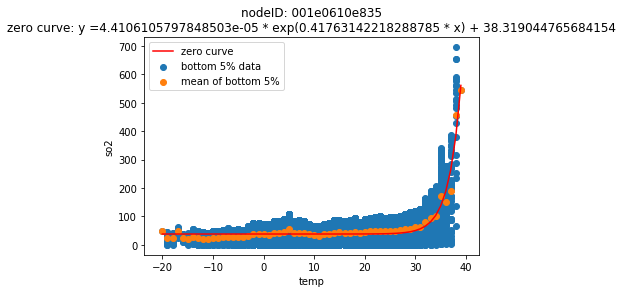

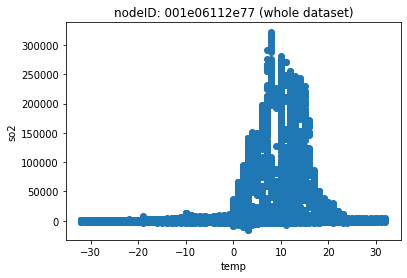

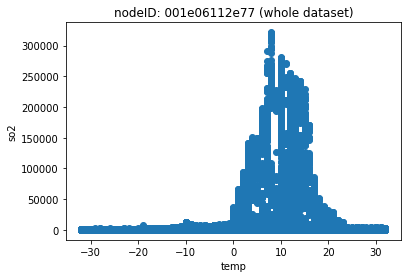

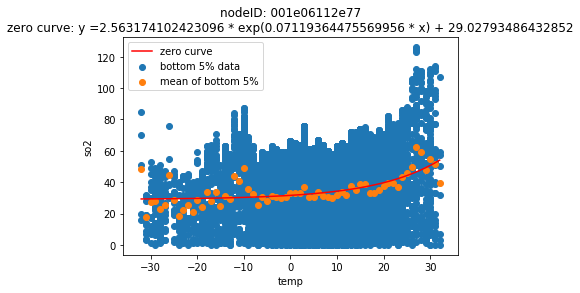

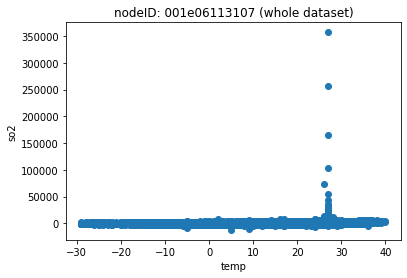

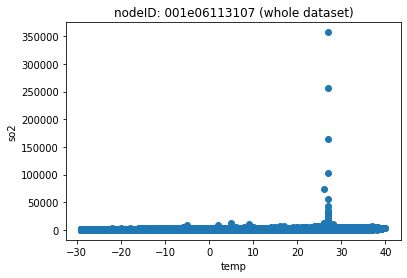

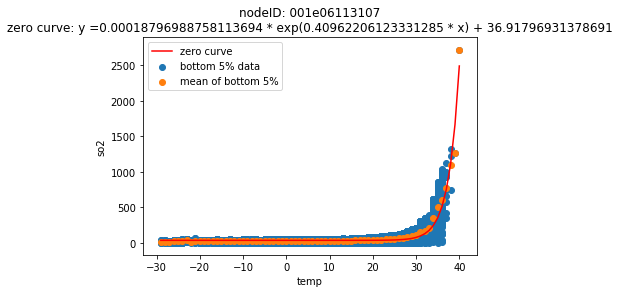

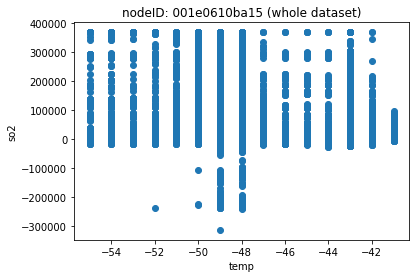

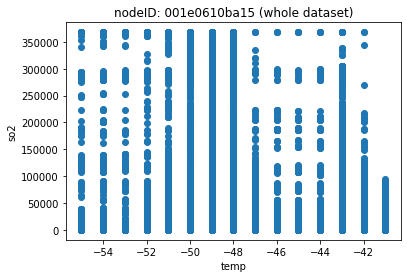

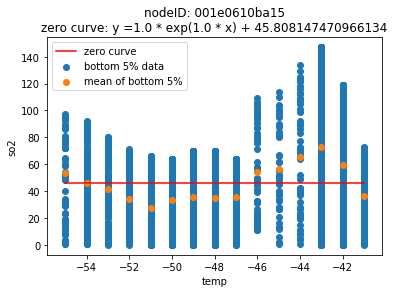

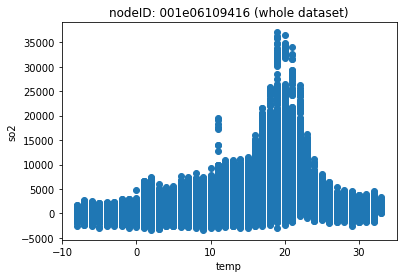

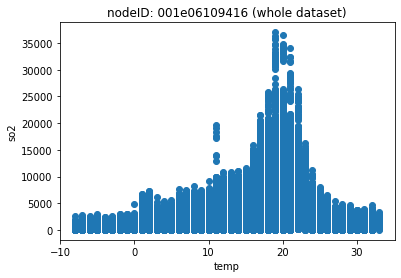

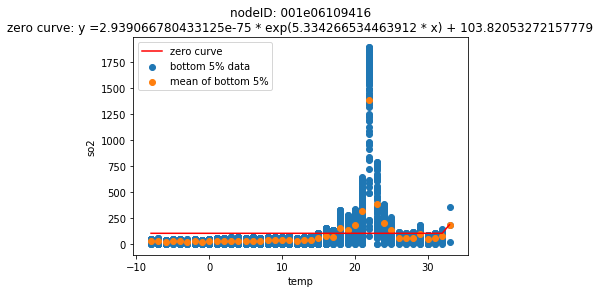

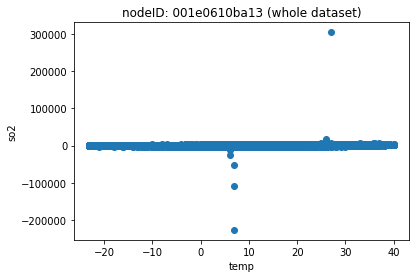

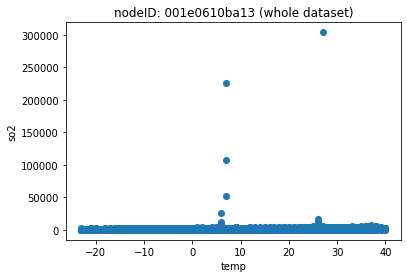

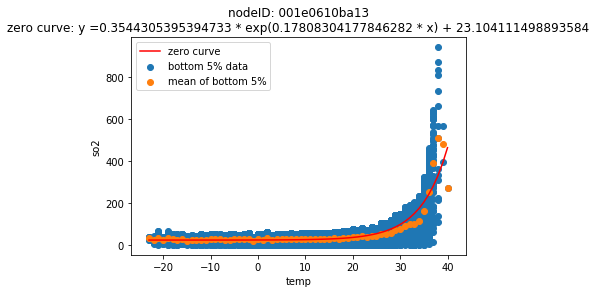

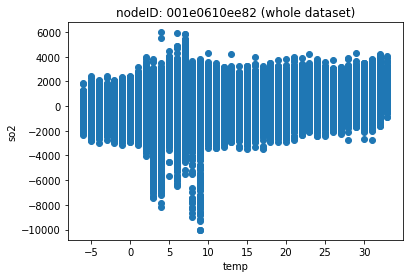

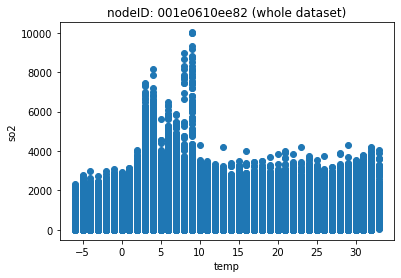

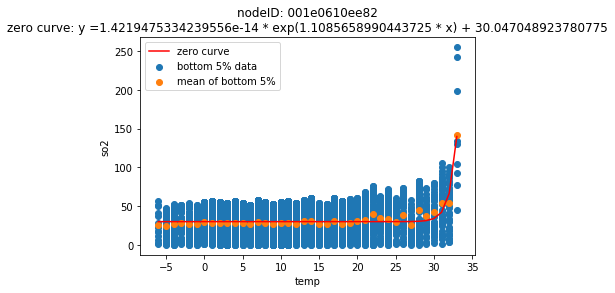

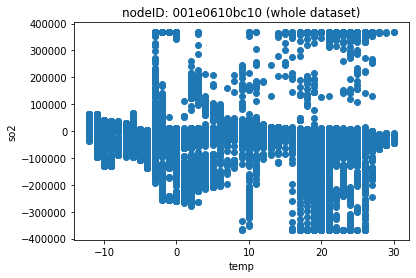

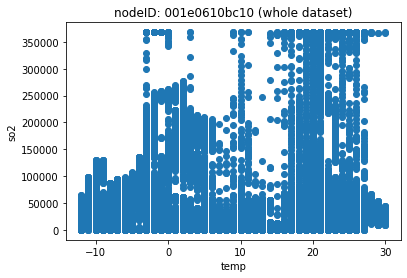

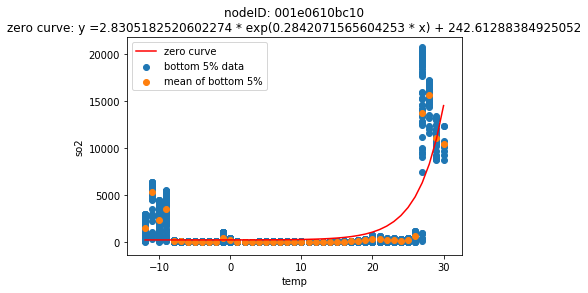

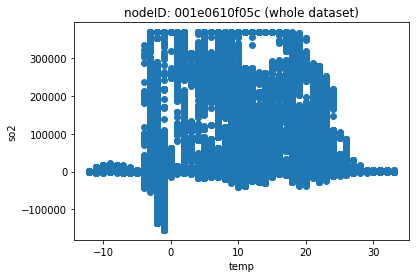

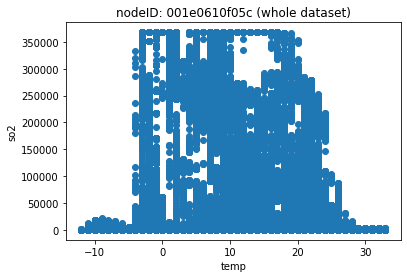

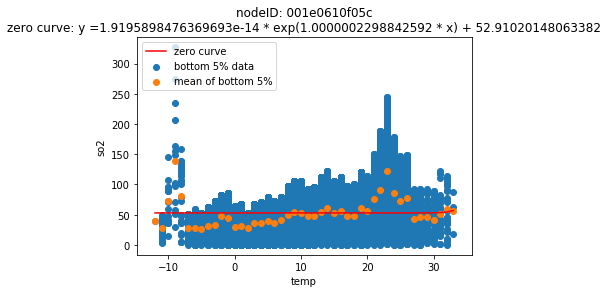

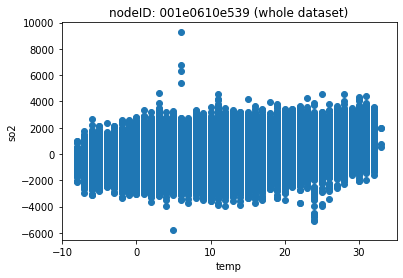

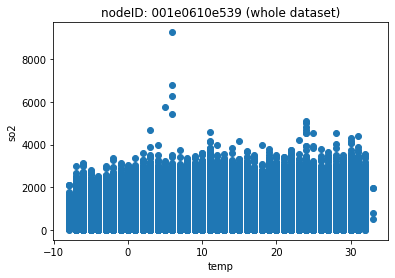

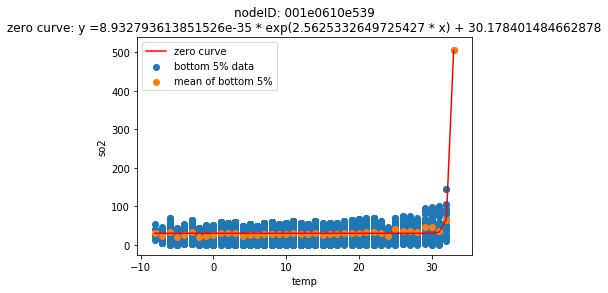

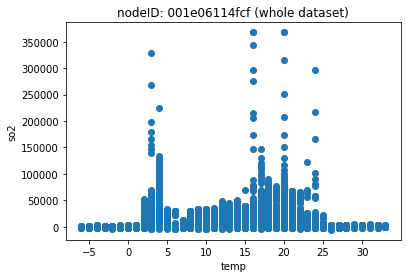

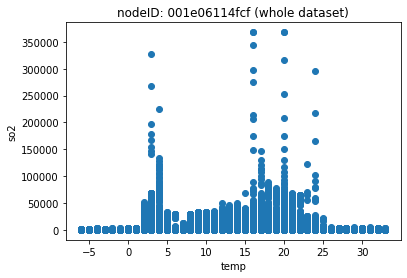

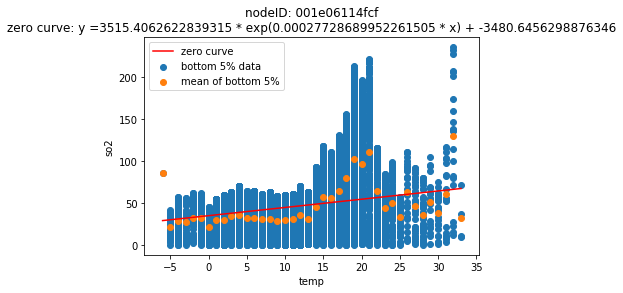

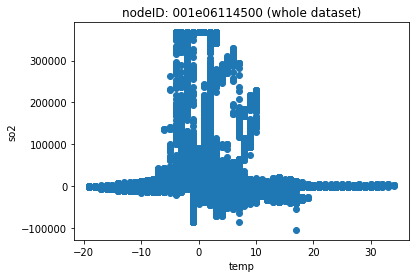

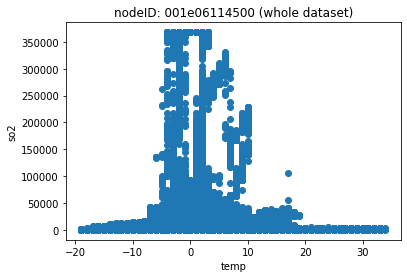

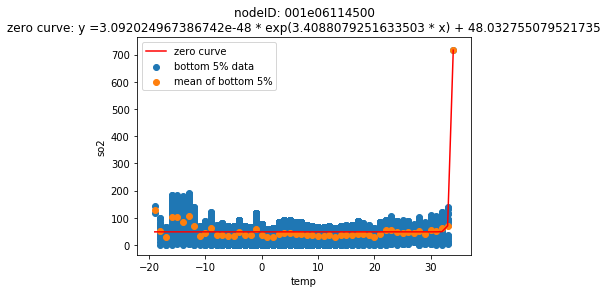

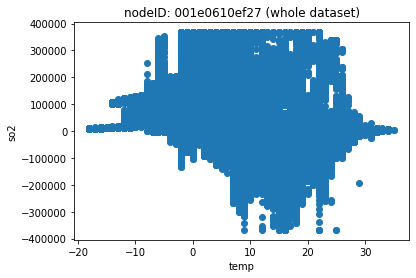

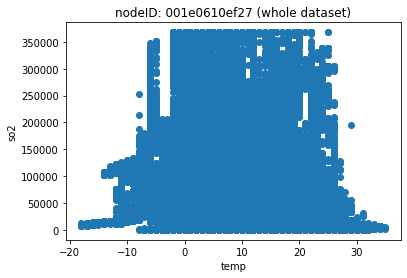

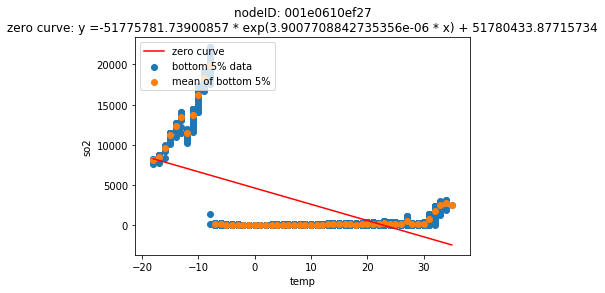

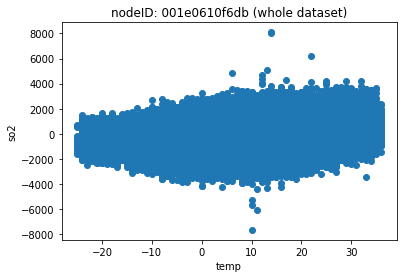

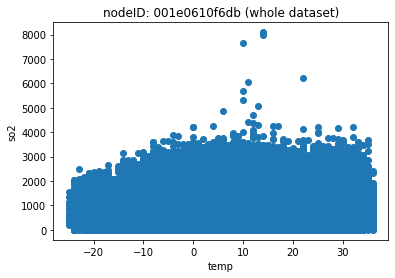

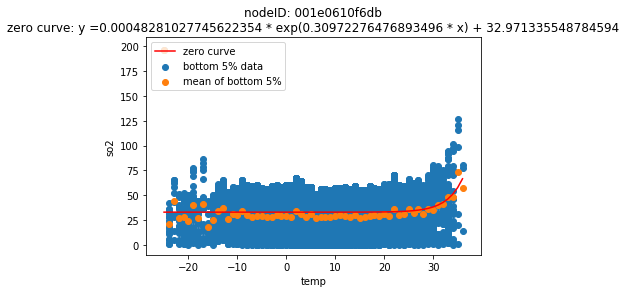

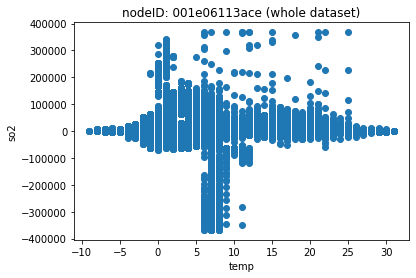

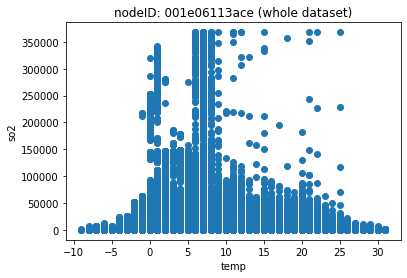

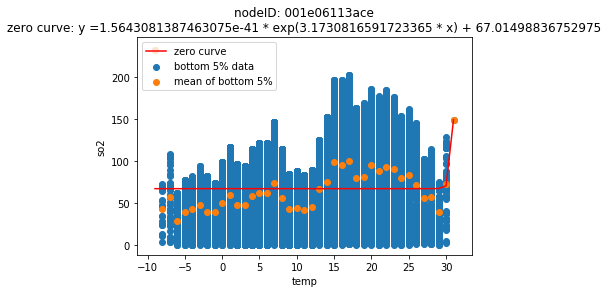

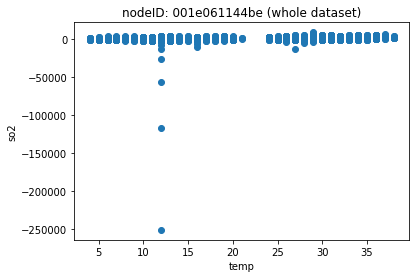

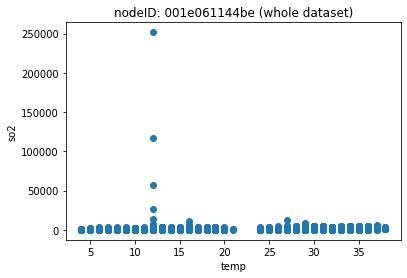

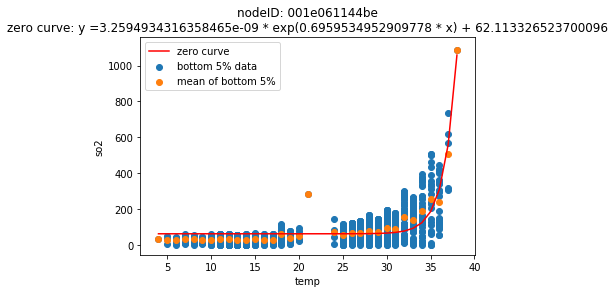

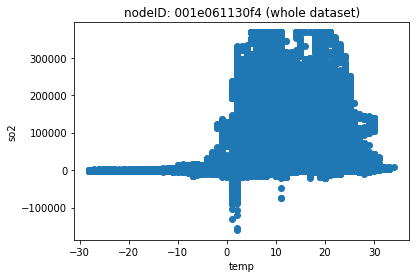

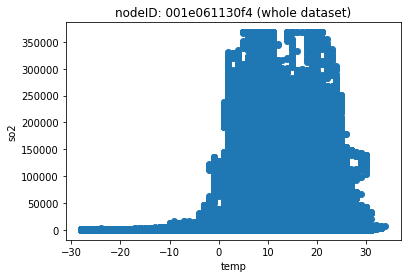

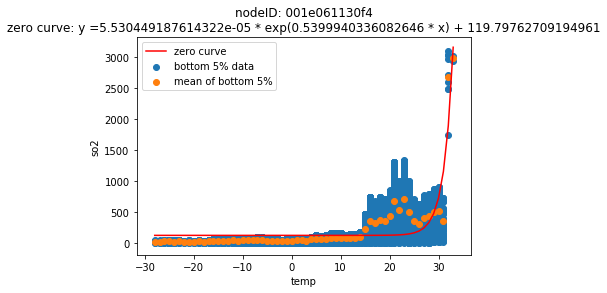

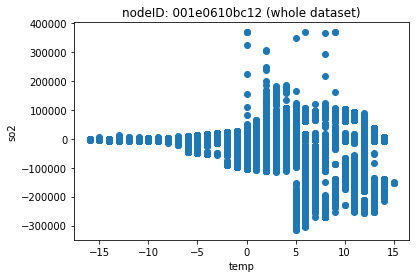

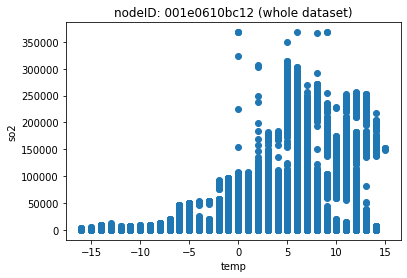

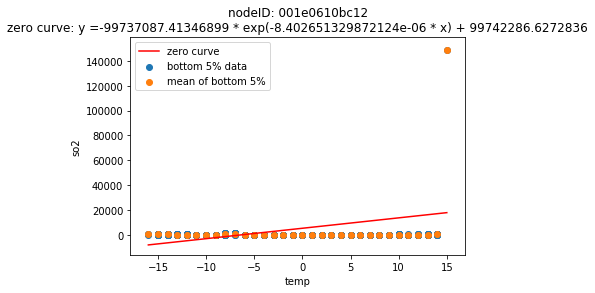

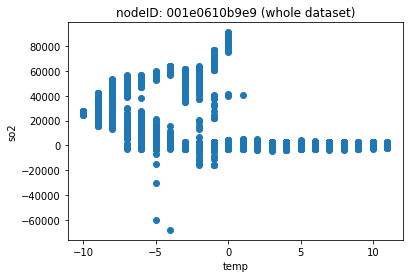

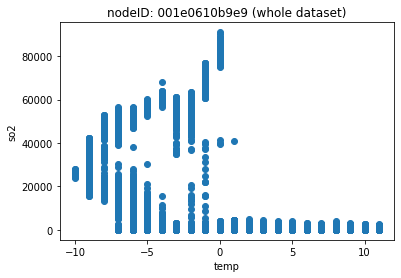

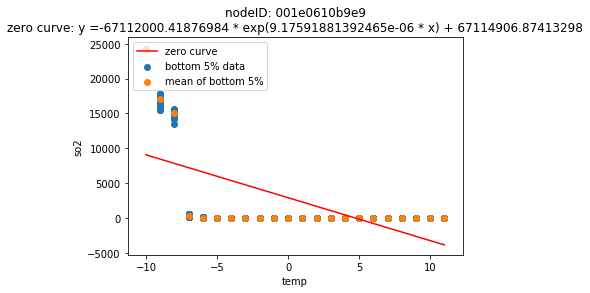

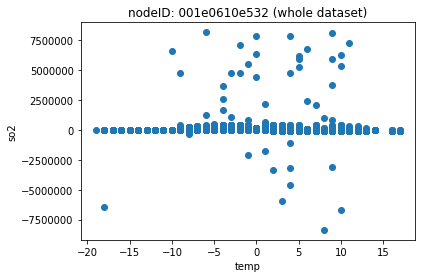

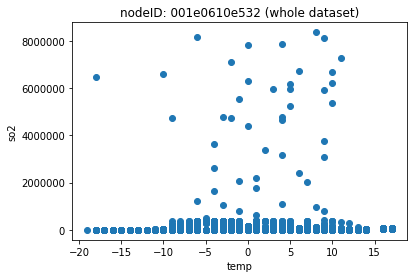

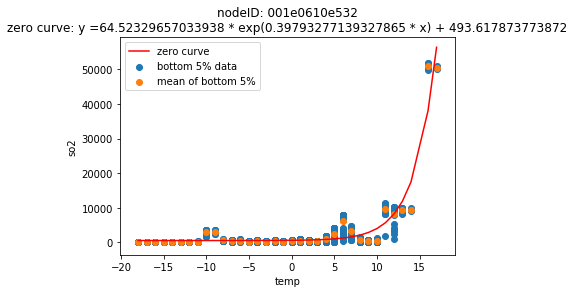

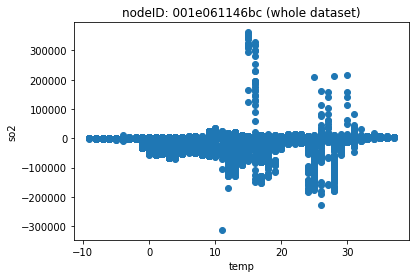

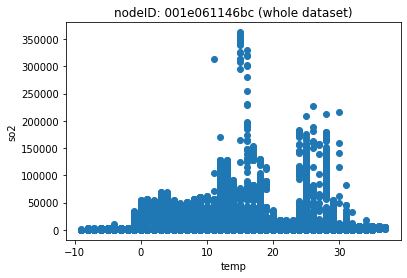

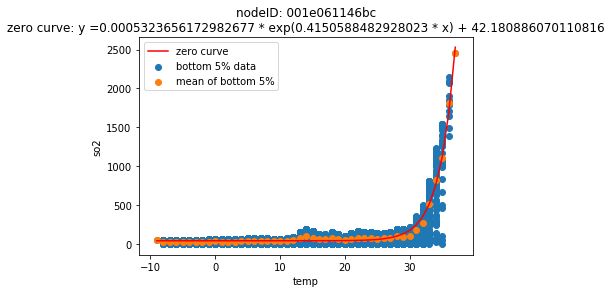

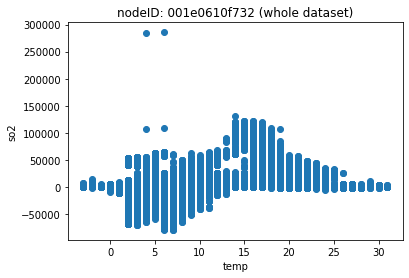

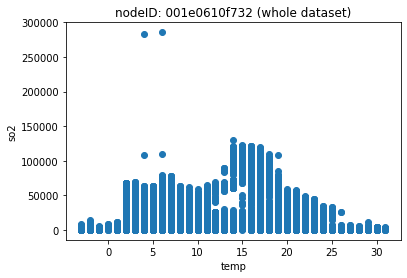

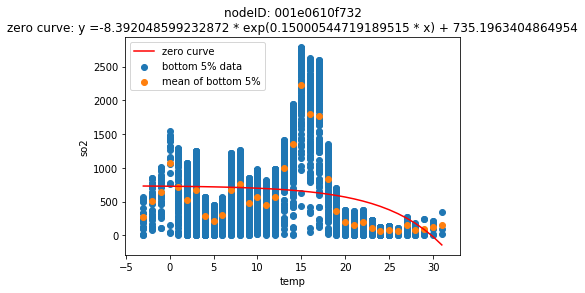

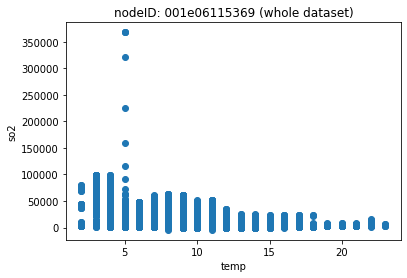

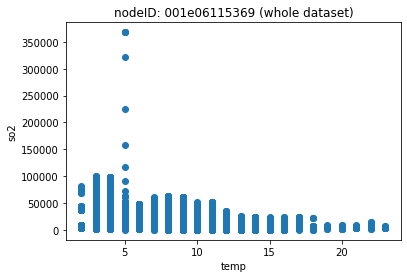

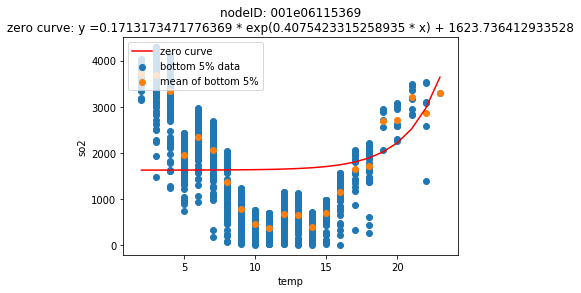

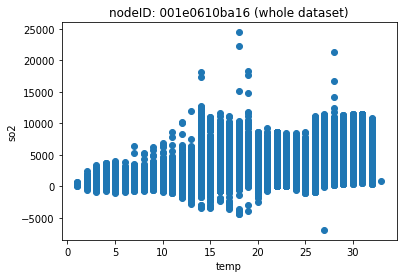

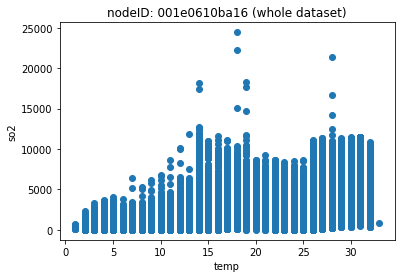

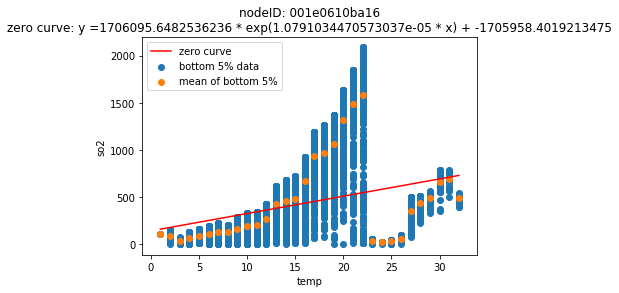

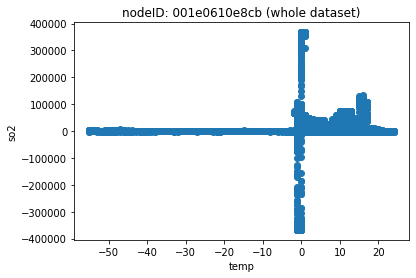

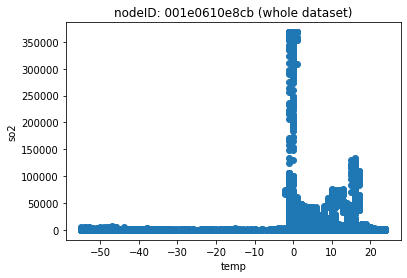

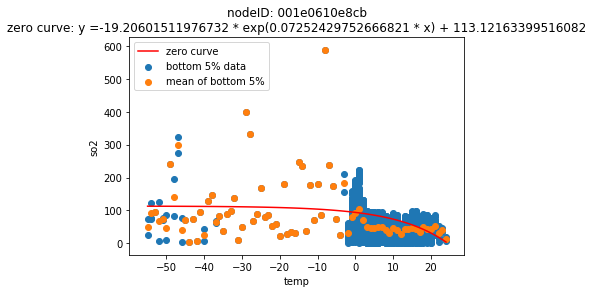

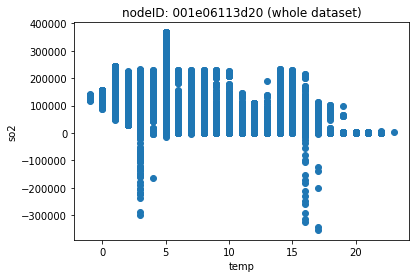

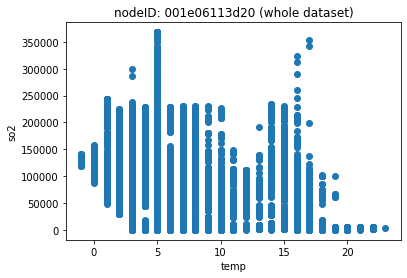

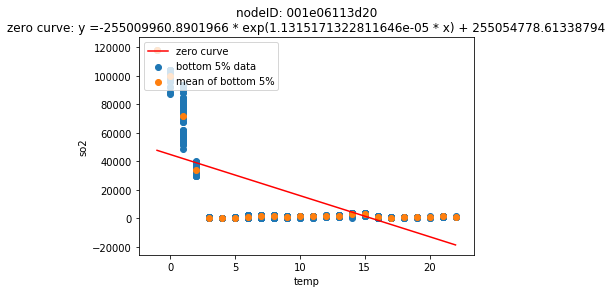

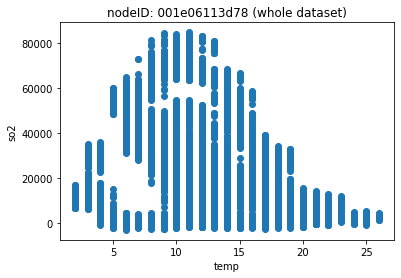

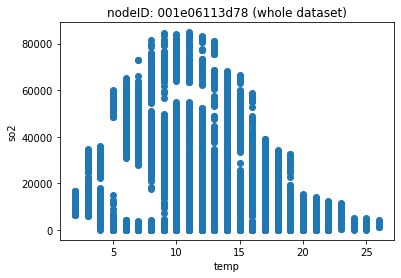

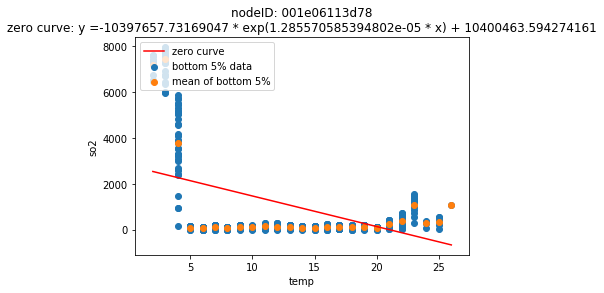

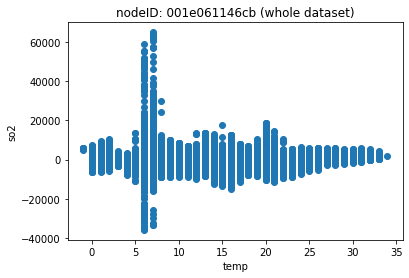

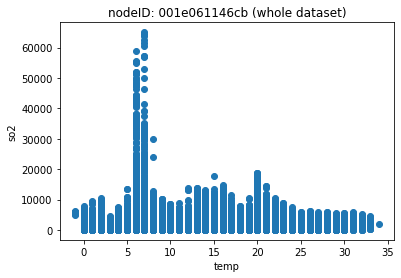

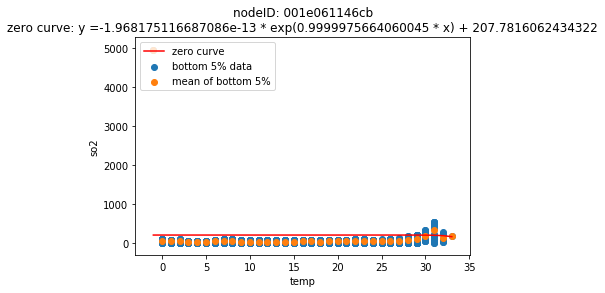

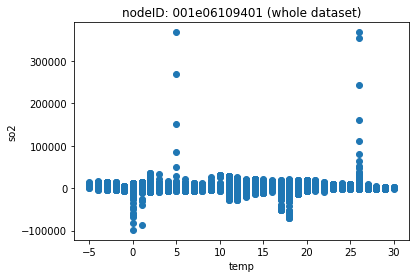

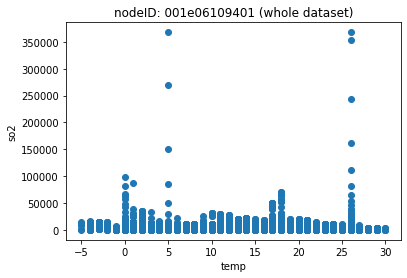

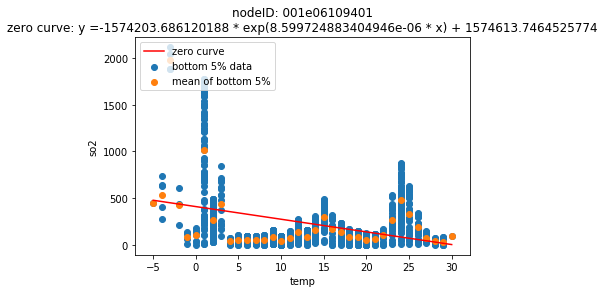

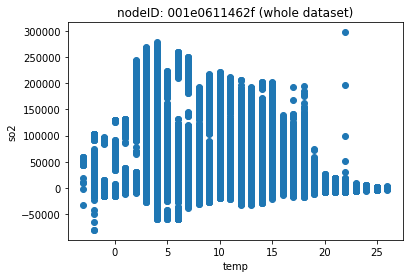

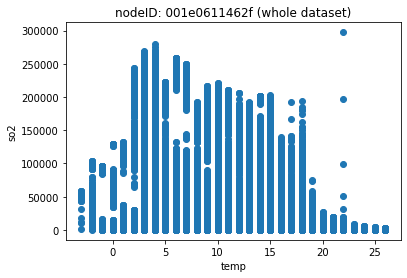

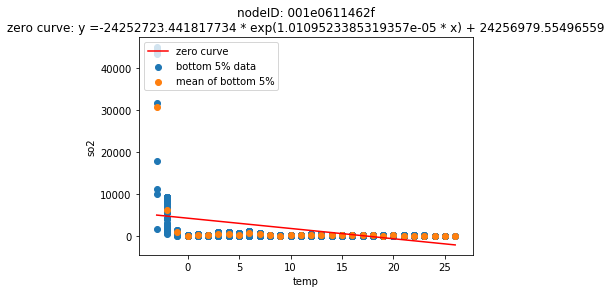

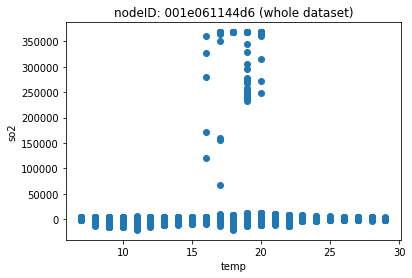

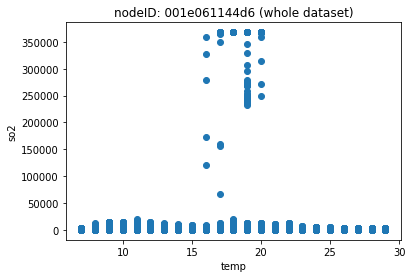

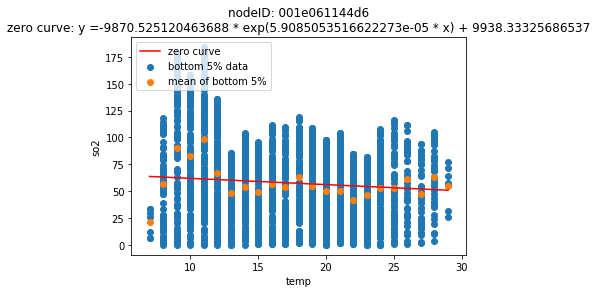

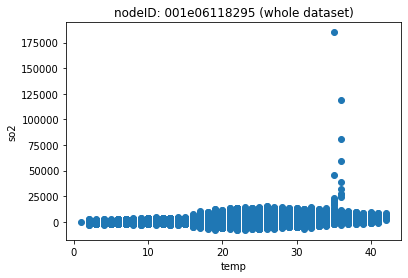

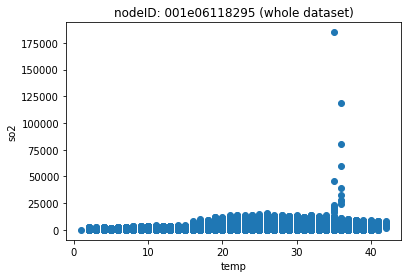

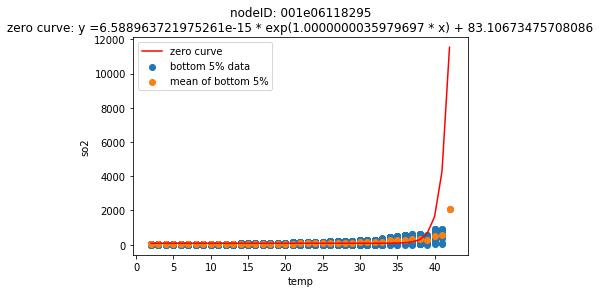

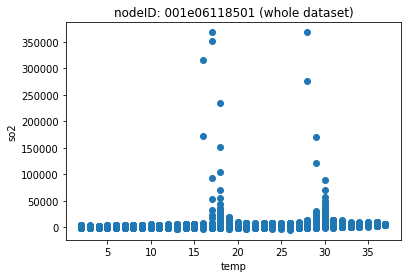

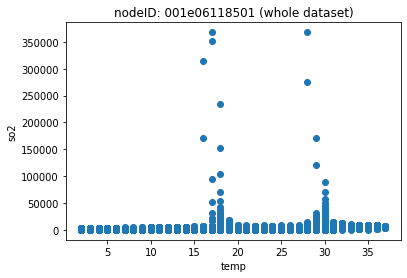

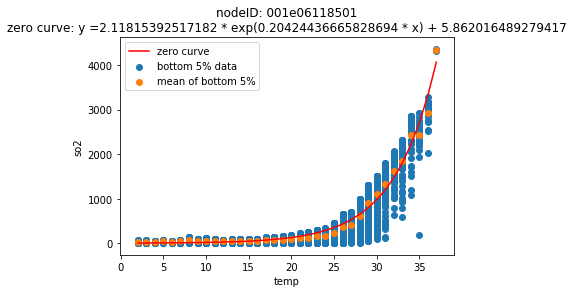

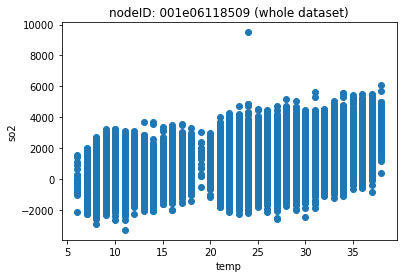

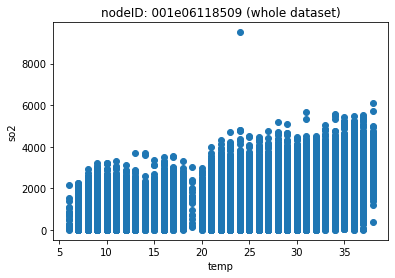

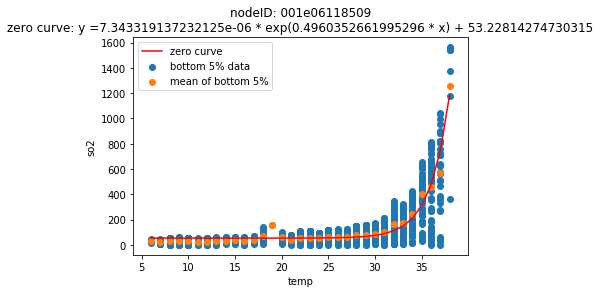

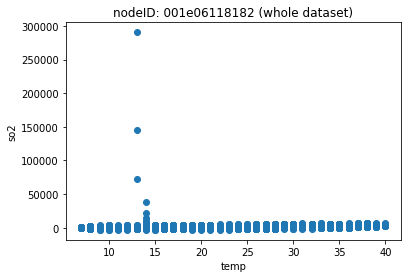

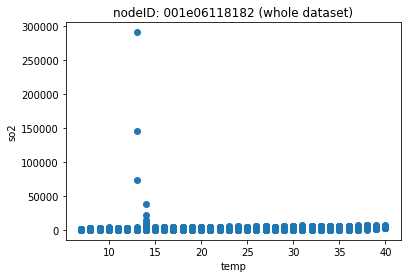

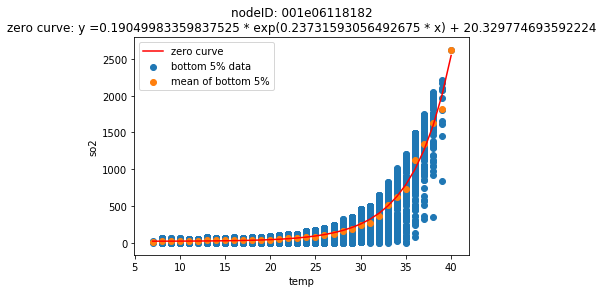

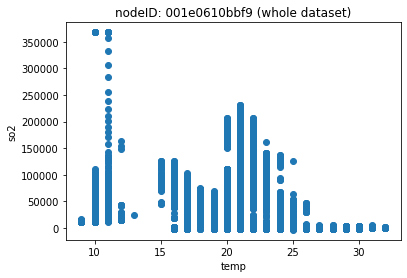

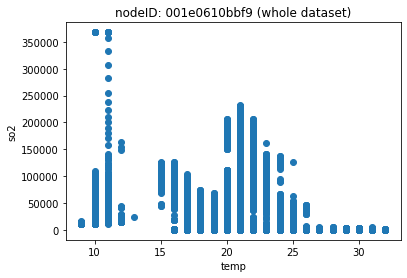

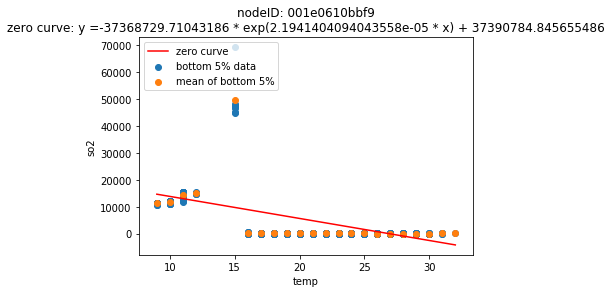

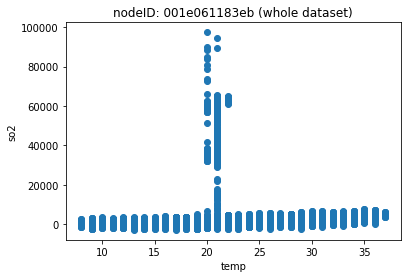

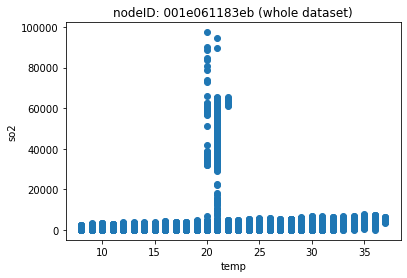

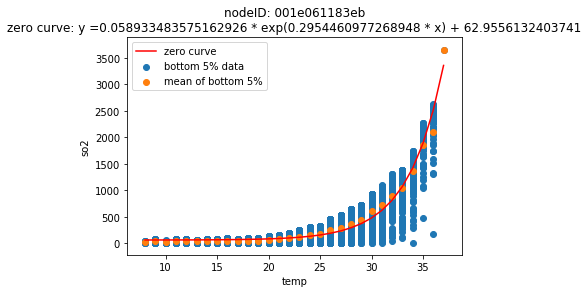

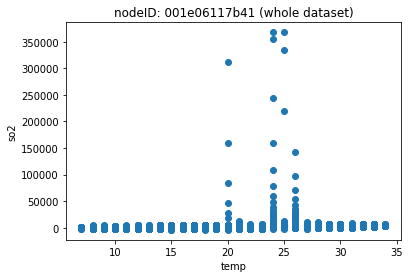

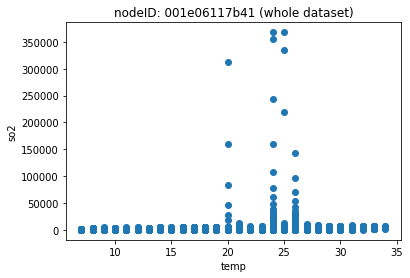

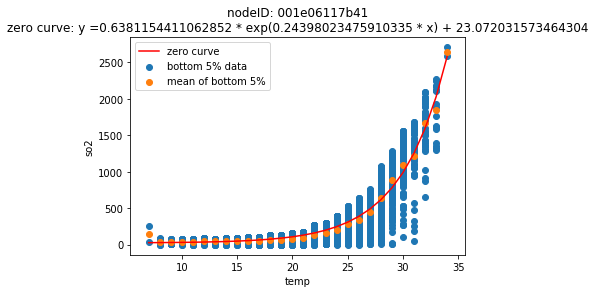

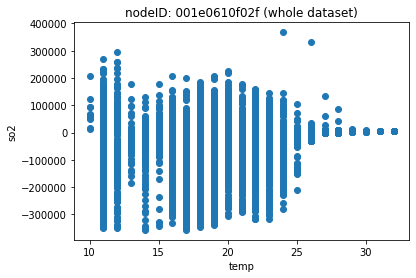

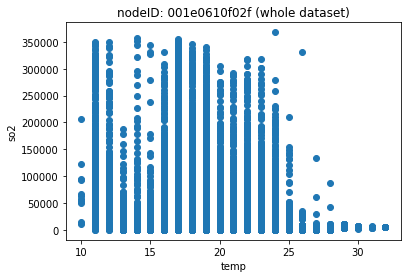

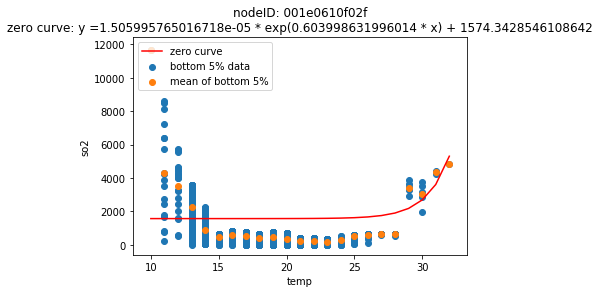

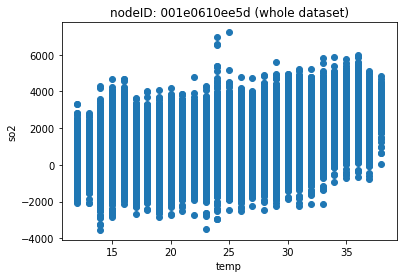

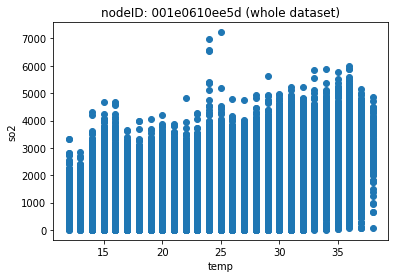

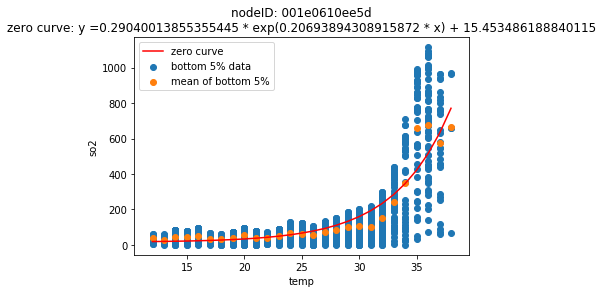

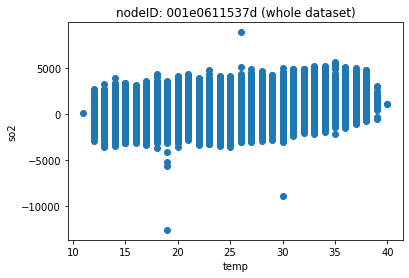

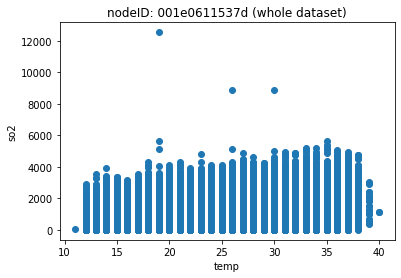

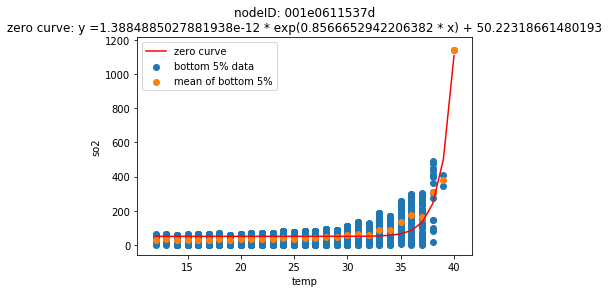

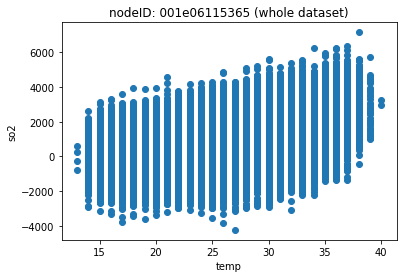

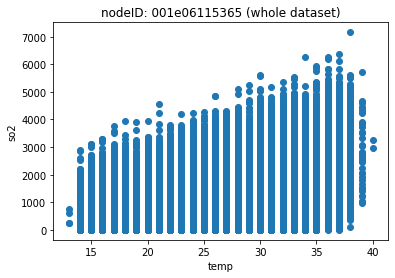

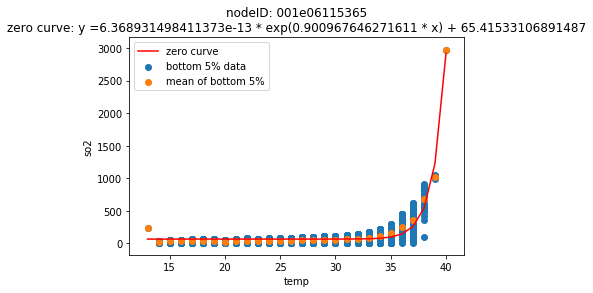

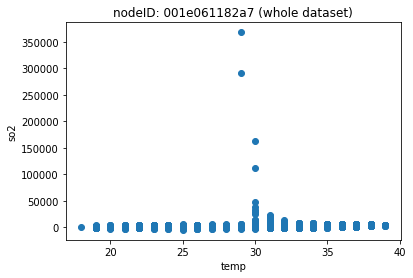

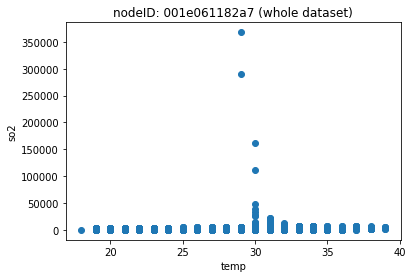

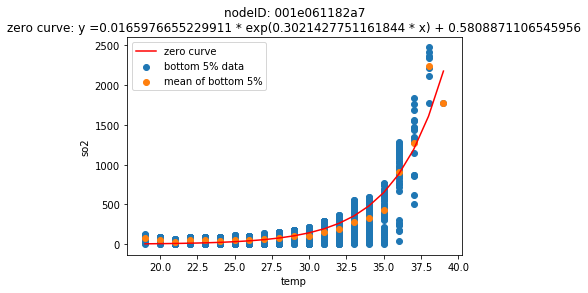

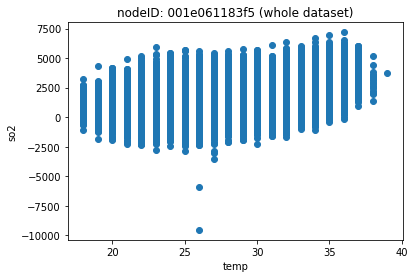

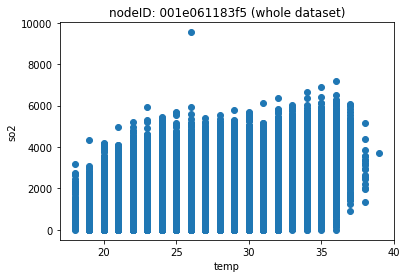

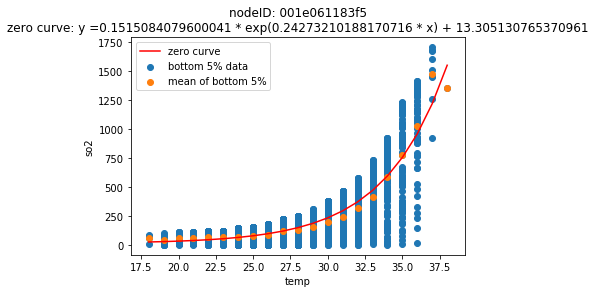

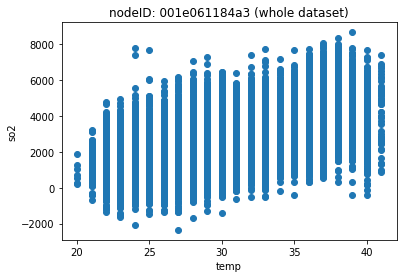

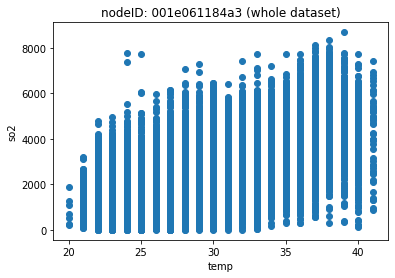

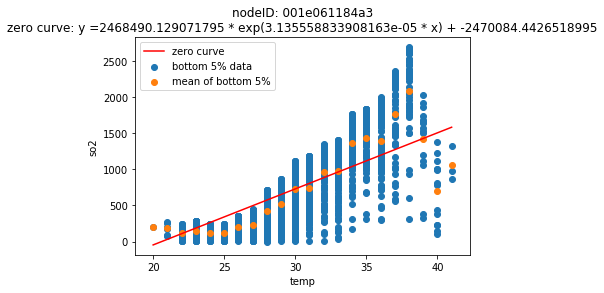

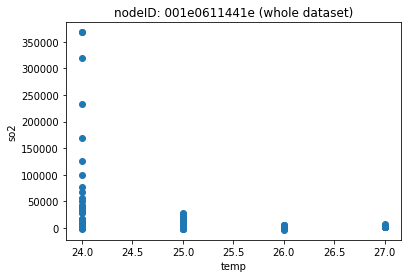

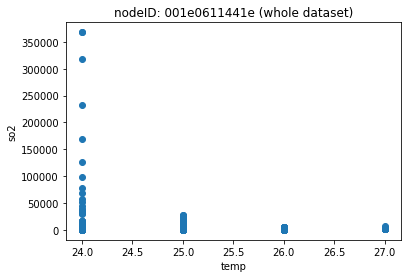

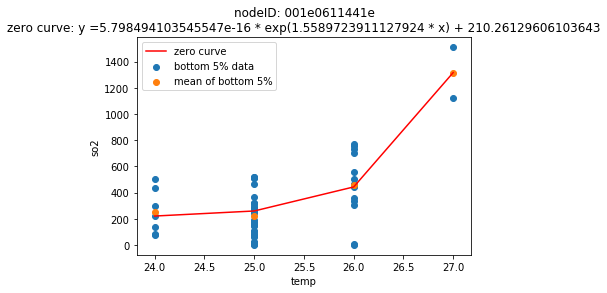

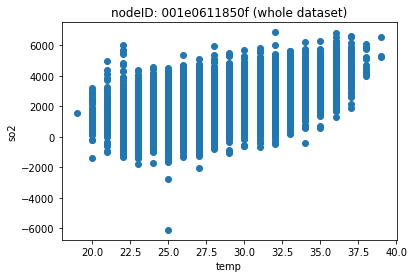

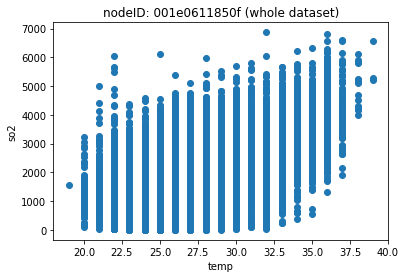

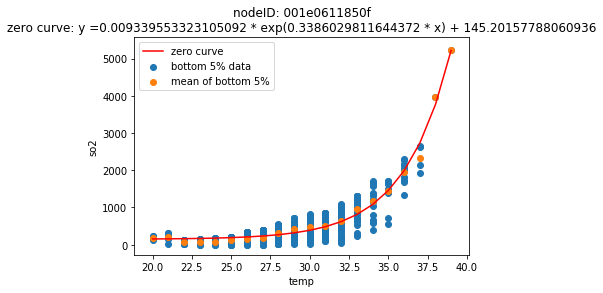

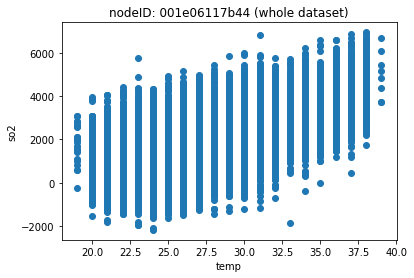

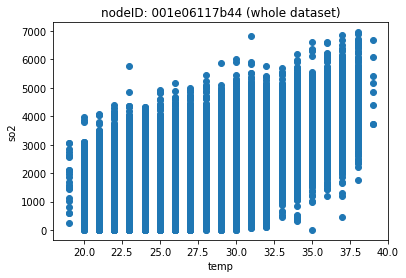

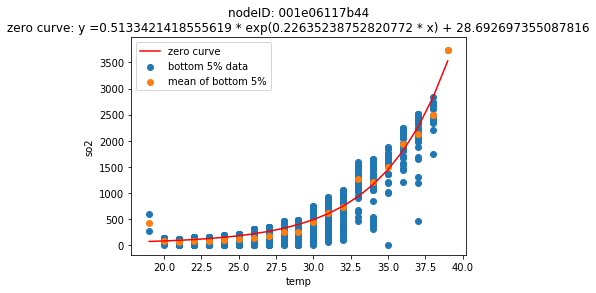

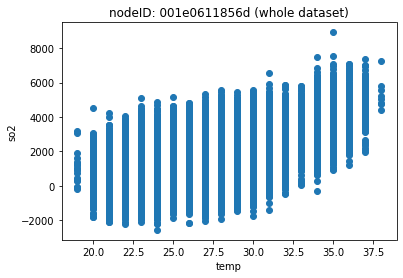

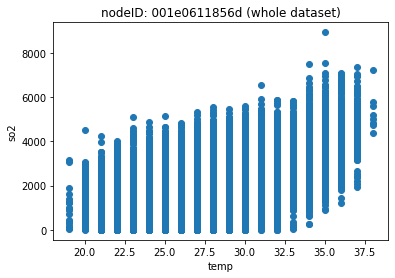

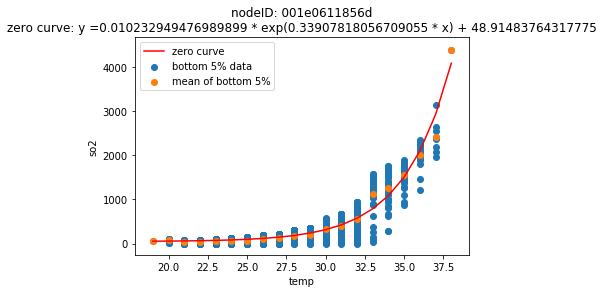

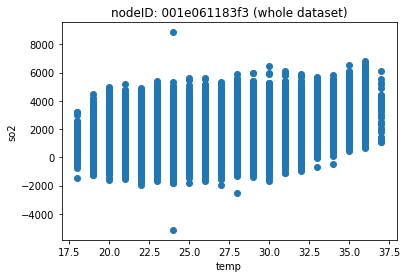

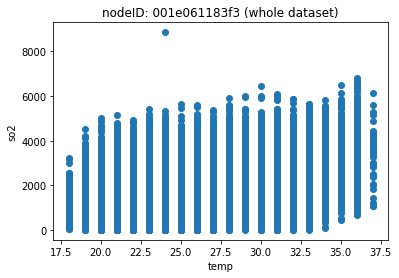

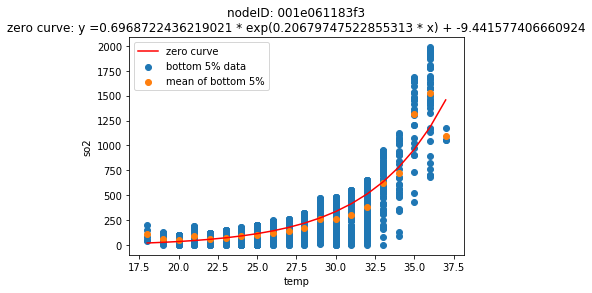

In [14]:
with open('curve_coefficients_so2.csv', "w") as csv_file:
    writer = csv.writer(csv_file, delimiter=',')
    writer.writerow(['y=a*exp(b*x)+c'])
    writer.writerow(['NodeID', 'a', 'b', 'c'])
    
    for i in range(so2_temp['node_id'].nunique()):

        node = pd.read_csv('nodedata_so2/'+nodes[i]+'.csv',header = 0, index_col=0)
        node['temp'] = round(node['temp'])
        node = node[~node['temp'].isna()]
        node = node.sort_values(by=['temp'])
        plt.figure()
        plt.scatter(node['temp'], node['so2_raw'])
        plt.title('nodeID: '+nodes[i] +' (whole dataset)')
        plt.xlabel('temp')
        plt.ylabel('so2')
        plt.savefig('node_pic_abs_so2/'+nodes[i]+'_1.png')
    
        node['abs_so2_raw'] = abs(node['so2_raw'])
        plt.figure()
        plt.scatter(node['temp'], node['abs_so2_raw'])
        plt.title('nodeID: '+nodes[i] +' (whole dataset)')
        plt.xlabel('temp')
        plt.ylabel('so2')
        plt.savefig('node_pic_abs_so2/'+nodes[i]+'_2.png')
       
        node_bottom = node[(node['abs_so2_raw'] < node.groupby('temp')['abs_so2_raw'].transform(lambda x: x.quantile(0.05)))]
        node_bottom_mean = node_bottom.groupby('temp').mean().reset_index()
    
        xdata = np.array(node_bottom_mean['temp'])
        ydata = np.array(node_bottom_mean['abs_so2_raw'])
        popt, pso2v = curve_fit(func, xdata, ydata, maxfev = 50000)
        
        writer.writerow([nodes[i], str(popt[0]), str(popt[1]), str(popt[2])])
        
        plt.figure()
        plt.scatter(node_bottom['temp'], node_bottom['abs_so2_raw'], label='bottom 5% data') #show scatter plot of original data
        plt.scatter(node_bottom_mean['temp'], node_bottom_mean['abs_so2_raw'],label='mean of bottom 5%') 
        plt.plot(xdata,func(xdata, *popt),'r-', label='zero curve')
        plt.xlabel('temp')
        plt.ylabel('so2')
        plt.title('nodeID: '+nodes[i] +'\n'+
         'zero curve: y =' + str(popt[0]) + ' * exp('+ str(popt[1]) + ' * x)' + ' + ' + str(popt[2]))
        plt.legend(loc=2)
        plt.savefig('node_pic_abs_so2/'+nodes[i]+'_3.png')
        print(i)
        